# EEG - ERP Preprocessing Script

This script is a preprocessing script for EEG data. The file you're seeing is called a [Jupyter notebook](https://jupyter.org/), which is a way to write and run Python code in a way that is easy to read and understand.

Even if you've never used Python, you can use this notebook to preprocess EEG data. You can run the code in each cell by clicking on the cell and pressing `Shift + Enter`.

This script is designed to be used with the [MNE-Python](https://mne.tools/stable/index.html) library. MNE-Python is a powerful library for analyzing EEG data, and it has many built-in functions for preprocessing, visualization, and analysis.

The first thing we need to do is install MNE-Python. You can do this by running the cell below. (Remember to press `Shift + Enter` to run the code in the cell.)


In [1]:
pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.5 MB/s eta 0:00:00


In [2]:
import mne
mne.set_log_level('ERROR')
from mne.io import read_raw_brainvision

import matplotlib.pyplot as plt

## Access EEG Data on Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Load EEG data

Raw EEG data is typically stored in a one or more files containing continuous EEG data. There are many different proprietary file formats for EEG data; most of these are developed by the manufacturer of a particular EEG system, since an integral part of an EEG system is software to save the data for later analysis. Fortunately, MNE provides functions to import data from most common EEG systems.

In the present case, we are working with data from a system sold by Brain Products, whose software is called *Brain Vision*. So we will use MNE's `read_raw_brainvision()` function. The Brain Vision format actually specifies *three files* for any given data set. The three files are all created at the time that the EEG data is acquired, and it's important to ensure that all three are copied when moving them around. The files are as follows:
- `*.eeg` is the actual EEG data (electrical potential measurements for all electrodes, at all time points). This is stored in a compressed (binary) format
- `*.vmrk` is a text file containing all of the markers (*trigger codes*) that were sent to the EEG system during data collection, by the stimulus computer. These typically encode the onset of various stimuli, and times of any responses by the participant, as well as and what each stimulus/response was.
- `*.vhdr` is a text file with header information, or **metadata** about the data set, including technical details such as the sampling rate, and the settings of the EEG amplifier during the recording. The `.vhdr` file is particularly important because it specifies the file names of the `.eeg` and `.vmrk` files (although they should always be named consistently with the header file).

When we run `read_raw_brainvision()` the file we will actually pass as an argument is the `.vhdr` file. Since it specifies the names of the associated `.eeg` and `.vmrk` files, from this file MNE can find the data and markers.


In [ ]:
raw = read_raw_brainvision('../data/sub-001/sub-001.vhdr')

Extracting parameters from ../data/sub-001/sub-001.vhdr...
Setting channel info structure...


# View raw file metadata

We can view some of the information about the data that's stored with it in the file: the sampling rate, the number of channels, and the names of the channels. This information is stored in the `info` attribute of the `raw` object. We can access it by typing `raw.info`.

In [ ]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>

There's actually a lot more information that is shown by the above command. For example, we can see a list of the channel names by typing `raw.info['ch_names']`.

In [ ]:
raw.info['ch_names']

['Channel 1',
 'Channel 2',
 'Channel 3',
 'Channel 4',
 'Channel 5',
 'Channel 6',
 'Channel 7',
 'Channel 8']

As you can see, the channel names are not the International 10-20 system names that are typically used in EEG research. Instead, they are the names that were assigned by the EEG system when the data was collected. We can change the channel names to the 10-20 system names by defining a mapping between the labels in the data and the 10-20 system names, and then using that to rename the channels.

In [ ]:
# channel mapping
channel_mapping = {'Channel 1':'O2',
                   'Channel 2':'P4',
                   'Channel 3':'C4',
                   'Channel 4':'Cz',
                   'Channel 5':'Fz',
                   'Channel 6':'C3',
                   'Channel 7':'P3',
                   'Channel 8':'O1'
                    }

# rename the channels
raw.rename_channels(channel_mapping)


<RawBrainVision | sub-001.eeg, 8 x 231984 (927.9 s), ~11 kB, data not loaded>

Now if we ask for the channel names again, we will see that they have been changed to the 10-20 system names:

In [ ]:
raw.info['ch_names']

['O2', 'P4', 'C4', 'Cz', 'Fz', 'C3', 'P3', 'O1']

Although the channels now have their correct names, we also need to load in information about where each 10-20 system electrode is located on the scalp. This information is stored in a file called a montage. We can load in the montage by running the following code:

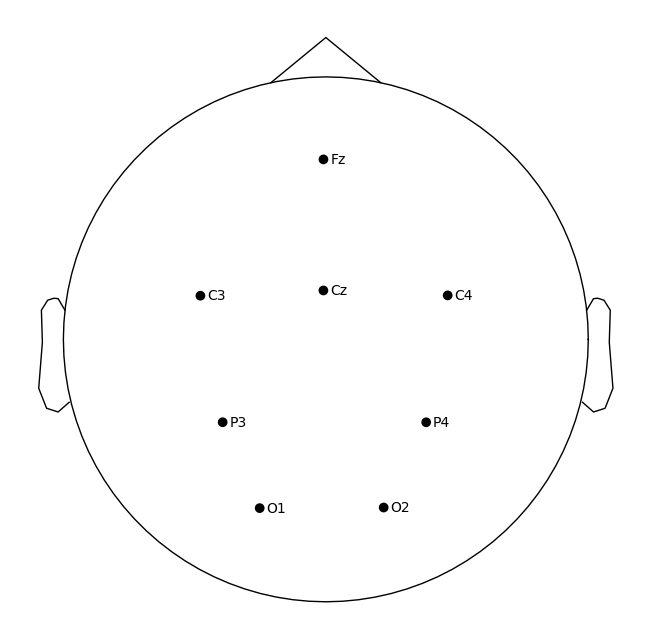

In [ ]:
# load the montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# show a figure of the montage in raw
raw.plot_sensors(show_names=True)
plt.show()

The above figure confirms that the locations are correctly located on the scalp.

In [ ]:
raw.plot()